In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/heart failure.csv');df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

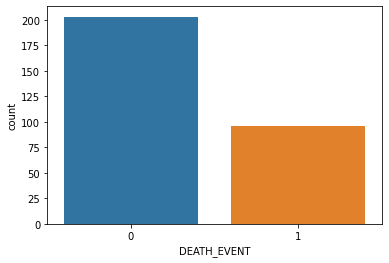

In [5]:
sns.countplot(x = 'DEATH_EVENT',data = df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

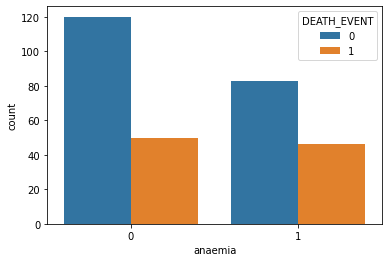

In [6]:
sns.countplot(x = 'anaemia',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

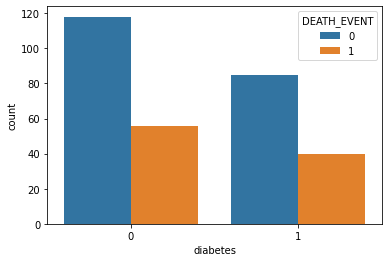

In [7]:
sns.countplot(x = 'diabetes',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

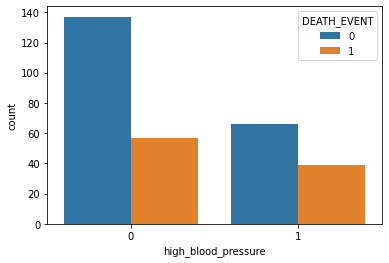

In [8]:
sns.countplot(x = 'high_blood_pressure',data=df,hue='DEATH_EVENT')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt.p

# Evaluate model

In [14]:
dt.score(xtest,ytest)

0.8111111111111111

In [15]:
y_pred = dt.predict(xtest)

In [16]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [17]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



<AxesSubplot:>

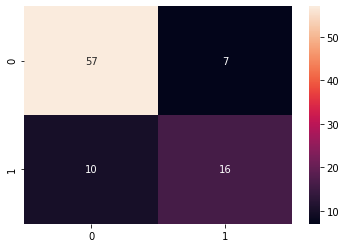

In [18]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True)

In [21]:
import matplotlib.pyplot as plt

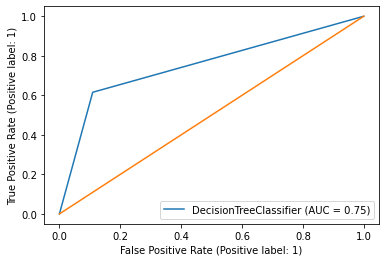

In [22]:
plot_roc_curve(dt,xtest,ytest)
plt.plot([0,1])

# Tuning

##  Find the max_depth

In [ ]:
max_depth_range = list(range(1, 12))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(xtrain, ytrain)   
    score = clf.score(xtest, ytest)
    accuracy.append(score)

In [ ]:
plt.plot(max_depth_range,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
grids = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2],
    'min_samples_split' :
    'min_samples_leaf' :
    
}